In [236]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [237]:
data = pd.read_csv('resources/model_data.csv')
data.head()

,gameNum,player,points,win,1_1_n,1_1_r,1_1_p,1_1_rp,1_2_n,1_2_r,...,2O,has_port,D,0.0278,0.0556,0.0833,0.1111,0.1389,probability_score,probability_score_2
0,1,1,5,0,6,L,0.1389,L0.1389,3,C,...,0,0,0,0,3,1,1,1,18,86
1,1,2,9,0,5,W,0.1111,W0.1111,8,O,...,0,0,0,0,1,2,2,1,21,129
2,1,3,10,1,5,S,0.1111,S0.1111,6,S,...,0,0,0,1,1,1,1,2,14,130
3,1,4,5,0,6,O,0.1389,O0.1389,9,L,...,0,0,0,0,1,2,1,2,16,156
4,2,1,10,1,6,W,0.1389,W0.1389,9,O,...,0,1,0,0,0,2,1,2,13,152


In [238]:
data = data.drop(columns=['gameNum', 'player', 'win',
                          '1_1_p', '1_1_rp', 
                          '1_2_p', '1_2_rp', 
                          '1_3_p', '1_3_rp', 
                          '2_1_p', '2_1_rp', 
                          '2_2_p', '2_2_rp',
                          '2_3_p', '2_3_rp',
                          'L','C', 'S', 'W', 'O', 'resource_pct',
                          '3G', '2L', '2C', '2S', '2W', '2O',
                          'has_port', 'D', 
                          '0.0278', '0.0556', '0.0833', '0.1111', '0.1389',
                          'probability_score', 'probability_score_2'])

In [239]:
data = pd.get_dummies(data)
data.head()

,points,1_1_n,1_2_n,1_3_n,2_1_n,2_2_n,2_3_n,1_1_r_C,1_1_r_L,1_1_r_O,...,2_3_r_2S,2_3_r_2W,2_3_r_3G,2_3_r_B,2_3_r_C,2_3_r_D,2_3_r_L,2_3_r_O,2_3_r_S,2_3_r_W
0,5,6,3,11,9,10,11,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,9,5,8,10,4,5,11,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,10,5,6,12,8,4,3,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,5,6,9,3,4,8,10,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,10,6,9,10,8,10,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [240]:
X = data[['1_1_n', '1_2_n', '1_3_n', '2_1_n', '2_2_n', '2_3_n',
       '1_1_r_C', '1_1_r_L', '1_1_r_O', '1_1_r_S', '1_1_r_W', '1_2_r_C',
       '1_2_r_L', '1_2_r_O', '1_2_r_S', '1_2_r_W', '1_3_r_2L', '1_3_r_2S',
       '1_3_r_2W', '1_3_r_3G', '1_3_r_C', '1_3_r_D', '1_3_r_L', '1_3_r_O',
       '1_3_r_S', '1_3_r_W', '2_1_r_C', '2_1_r_L', '2_1_r_O', '2_1_r_S',
       '2_1_r_W', '2_2_r_2O', '2_2_r_C', '2_2_r_L', '2_2_r_O', '2_2_r_S',
       '2_2_r_W', '2_3_r_2C', '2_3_r_2L', '2_3_r_2O', '2_3_r_2S', '2_3_r_2W',
       '2_3_r_3G', '2_3_r_B', '2_3_r_C', '2_3_r_D', '2_3_r_L', '2_3_r_O',
       '2_3_r_S', '2_3_r_W']]
y = data['points'].values.reshape(-1,1)
print(X.shape, y.shape)

(204, 50) (204, 1)


In [242]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [243]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [244]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression()

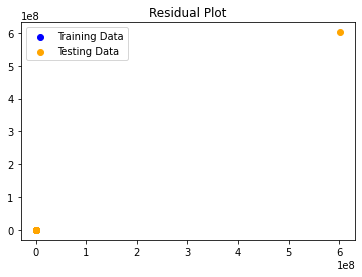

In [245]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION